# quant-econ Solutions: Search with Unknown Offer Distribution

Solutions for http://quant-econ.net/py/odu.html

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import compute_fixed_point
from odu import SearchProblem

## Exercise 1


This code solves the "Offer Distribution Unknown" model by iterating on a guess of the
reservation wage function. You should find that the run time is much shorter than that of the value function approach in `odu_vfi.py`


Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            2.829e-02      2.087e-01         
10           5.174e-03      3.894e-01         
15           9.652e-04      5.700e-01         


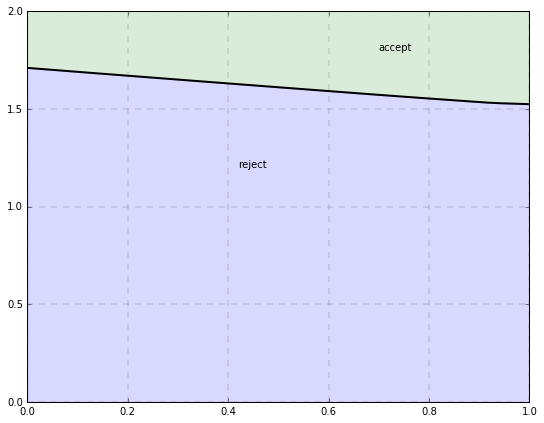

In [3]:
sp = SearchProblem(pi_grid_size=50)

phi_init = np.ones(len(sp.pi_grid)) 
w_bar = compute_fixed_point(sp.res_wage_operator, phi_init)

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(sp.pi_grid, w_bar, linewidth=2, color='black')
ax.set_ylim(0, 2)
ax.grid(axis='x', linewidth=0.25, linestyle='--', color='0.25')
ax.grid(axis='y', linewidth=0.25, linestyle='--', color='0.25')
ax.fill_between(sp.pi_grid, 0, w_bar, color='blue', alpha=0.15)
ax.fill_between(sp.pi_grid, w_bar, 2, color='green', alpha=0.15)
ax.text(0.42, 1.2, 'reject')
ax.text(0.7, 1.8, 'accept')
plt.show()

The next piece of code is not one of the exercises from quant-econ, it's just a fun simulation to see 
what the effect of a change in the underlying distribution on the unemployment rate is.

At a point in the simulation, the distribution becomes significantly worse.  It takes a while for agents to learn this, and in the meantime they are too optimistic, and turn down too many jobs.  As a result, the unemployment rate spikes.

The code takes a few minutes to run.

Iteration    Distance       Elapsed (seconds)
---------------------------------------------
5            2.829e-02      2.050e-01         
10           5.174e-03      3.851e-01         
15           9.652e-04      5.652e-01         
date = 0
date = 20
date = 40
date = 60
date = 80
date = 100
date = 120
date = 140
date = 160
date = 180
date = 200
date = 220
date = 240
date = 260
date = 280
date = 300
date = 320
date = 340
date = 360
date = 380
date = 400
date = 420
date = 440
date = 460
date = 480
date = 500
date = 520
date = 540
date = 560
date = 580


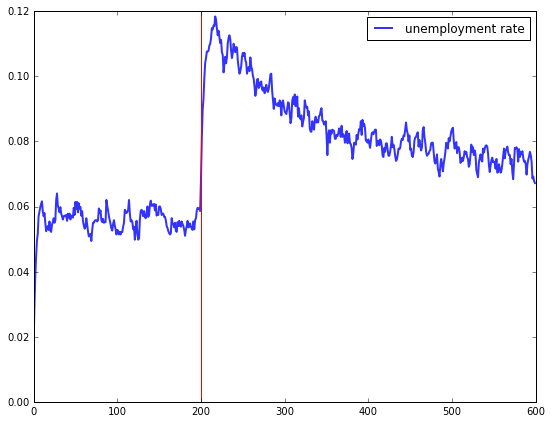

In [4]:
from scipy import interp
# Set up model and compute the function w_bar
sp = SearchProblem(pi_grid_size=50, F_a=1, F_b=1)
pi_grid, f, g, F, G = sp.pi_grid, sp.f, sp.g, sp.F, sp.G
phi_init = np.ones(len(sp.pi_grid)) 
w_bar_vals = compute_fixed_point(sp.res_wage_operator, phi_init)
w_bar = lambda x: interp(x, pi_grid, w_bar_vals)


class Agent(object):
    """
    Holds the employment state and beliefs of an individual agent.
    """

    def __init__(self, pi=1e-3):
        self.pi = pi
        self.employed = 1

    def update(self, H):
        "Update self by drawing wage offer from distribution H."
        if self.employed == 0:
            w = H.rvs()
            if w >= w_bar(self.pi):
                self.employed = 1
            else:
                self.pi = 1.0 / (1 + ((1 - self.pi) * g(w)) / (self.pi * f(w)))


num_agents = 5000
separation_rate = 0.025  # Fraction of jobs that end in each period 
separation_num = int(num_agents * separation_rate)
agent_indices = list(range(num_agents))
agents = [Agent() for i in range(num_agents)]
sim_length = 600
H = G  # Start with distribution G
change_date = 200  # Change to F after this many periods

unempl_rate = []
for i in range(sim_length):
    if i % 20 == 0:
        print("date =", i)
    if i == change_date:
        H = F
    # Randomly select separation_num agents and set employment status to 0
    np.random.shuffle(agent_indices)
    separation_list = agent_indices[:separation_num]
    for agent_index in separation_list:
        agents[agent_index].employed = 0
    # Update agents
    for agent in agents:
        agent.update(H)
    employed = [agent.employed for agent in agents]
    unempl_rate.append(1 - np.mean(employed))

fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(unempl_rate, lw=2, alpha=0.8, label='unemployment rate')
ax.axvline(change_date, color="red")
ax.legend()
plt.show()